# Chapter.4 Single-variate Linear Regression

## Programming Assignment.4-08 SVLR for Several Samples

PA 4-08d에서는 data sample을 여러개 사용하는 mini-batch를 이용해서 $\theta_{1}, \theta_{0}$를 update하는 방법을 다룹니다.

Chapter.3와 마찬가지로 이미 PA 4-07에서 만든 학습모델이 mini-batch에 대해서도 사용 가능하기 때문에 node들의 input, output diemnsion을 살펴보고 학습을 시켜봅니다.


PA 4-08는 다음과 같은 단계들로 이루어집니다.

<ul>
    <li> Step.1 Dataset Preparation </li>
    <li> Step.2 Model/Cost Implementation </li>
    <li> Step.3 Dimension Check </li>
    <li> Step.4 Learning </li>
    <li> Step.5 Learning with Various Batch Sizes </li>
</ul>


In [89]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

import basic_nodes as nodes
from LR_dataset_generator import LR_dataset_generator
    
plt.style.use('seaborn')
np.random.seed(0)

def get_data_batch(dataset, batch_idx, batch_size, n_batch):
    if batch_idx is n_batch -1:
        batch = dataset[batch_idx*batch_size:]
    else:
        batch = dataset[batch_idx*batch_size : (batch_idx+1)*batch_size]
    return batch

***
## Step.1 Dataset Preparation

dataset은 PA 4-07과 동일하게 만들어줍니다.  

PA 4-07과 마찬가지로 다양한 dataset이 학습에 어떠한 영향을 미치는지 살펴보기 위해 distribution parameter들을 설정해줍니다.  
이를 통해 dataset의 전체적인 특성에 따라 cost를 이용해도 $J = \theta_{1}^{2} + \theta_{0}^{2}$에 가까운 모습을 만들지 못하는 현상을 분석합니다.

***
**Programming**  
다음의 조건을 만족하는 dataset을 만드세요.

- target function = $y = 3x + 3$
- mean, std of x = 0, 1

(Hint.1) set_coefficient method  
(Hint.2) set_distribution_params method

In [111]:
np.random.seed(0)

##### Start Your Code(Dataset Setting) #####
coefficient_list = [3, 3]
distribution_params = {1:{'mean':0, 'std':1}}
##### End Your Code(Dataset Setting) #####


##### Start Your Code(Dataset Generation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Generation) #####

***
## Step.2 Model/Cost Implementation

강의에서 설명한 mini-batch에 대한 학습은 다음과 같습니다.

<img src='./imgs/4_08_01.png' width=900>

PA 4-07에서 달라지는 것은 forward propagation에서는 loss들의 평균을 구해주고,  
backpropagation에서는 n개의 path에 대해 각각 $\frac{1}{n}$을 곱해주는 역할을 하는 mean_node입니다.

***
**Programming**  
위의 model과 cost를 basic building node를 이용해서 instantiation하세요.

In [70]:
##### Start Your Code(Model Implementation) #####
node1 = nodes.mul_node()
node2 = nodes.plus_node()
##### End Your Code(Model Implementation) #####


##### Start Your Code(Loss Implementation) #####
node3 = nodes.minus_node()
node4 = nodes.square_node()
node5 = nodes.mean_node()
##### End Your Code(Loss Implementation) #####

***
## Step.3 Dimension Check

Step.3에선 Stpe.2에서 instantiation한 model과 cost function에 8개의 data sample로 만든 mini-batch를 입력하여 forward/backward propagation에서 일어나는 값들의 dimension을 살펴봅니다.

다음은 data를 mini-batch로 만드는 과정입니다.  
다음 셀을 실행시켜 data의 dimension을 확인하세요.

In [73]:
th1, th0 = 0.1, 0.1
batch_size = 8
batch_idx = 0
n_batch = int(np.ceil(dataset.shape[0]/batch_size))

batch = get_data_batch(dataset, batch_idx)
print("batch.shape : ", batch.shape)
X, Y = batch[:,1], batch[:,-1]
print("X.shape : ", X.shape)
print("Y.shape : ", Y.shape, '\n')

batch.shape :  (8, 3)
X.shape :  (8,)
Y.shape :  (8,) 



다음은 forward propagation에서 전달되는 값들의 dimension을 나타낸 코드입니다.

다음 셀을 실행하여 Z1부터 J까지의 dimension을 확인하세요.

In [8]:
Z1 = node1.forward(th1, X)
Z2 = node2.forward(th0, Z1)
Z3 = node3.forward(Y, Z2)
Z4 = node4.forward(Z3)
J = node5.forward(Z4)

print("Z1.shape : ", Z1.shape)
print("Z2.shape : ", Z2.shape)
print("Z3.shape : ", Z3.shape)
print("Z4.shape : ", Z4.shape)
print("J.shape : ", J.shape, '\n')

Z1.shape :  (8,)
Z2.shape :  (8,)
Z3.shape :  (8,)
Z4.shape :  (8,)
J.shape :  () 



다음은 backpropagation에서 전달되는 값들의 dimension을 나타낸 코드입니다.

다음 셀을 실행하여 dZ4부터 dTh0, dTh1까지 전달되는 값들의 dimension을 확인하세요.

In [10]:
dZ4 = node5.backward(1)
dZ3 = node4.backward(dZ4)
_, dZ2 = node3.backward(dZ3)
dTh0, dZ1 = node2.backward(dZ2)
dTh1, _ = node1.backward(dZ1)

print("dZ4.shape : ", dZ4.shape)
print("dZ3.shape : ", dZ3.shape)
print("dZ2.shape : ", dZ2.shape)
print("dZ1.shape : ", dZ1.shape)
print("dTh1.shape : ", dTh1.shape)
print("dTh0.shape : ", dTh0.shape, '\n')

dZ4.shape :  (8,)
dZ3.shape :  (8,)
dZ2.shape :  (8,)
dZ1.shape :  (8,)
dTh1.shape :  (8,)
dTh0.shape :  (8,) 



다음은 아직 vector로 dTh1, dTh0에 들어있는 partial derivative들을 더하여  
dth1, dth0를 구하는 과정입니다.

다음 셀을 실행하여 dth1, dth0가 scalar로 바뀌는 것을 확인하세요.

In [12]:
dth1 = np.sum(dTh1)
dth0 = np.sum(dTh0)

print("dth1.shape : ", dth1.shape)
print("dth0.shape : ", dth0.shape)

dth1.shape :  ()
dth0.shape :  ()


***
## Step.4 Learning

Step.4에서는 Step.3까지의 과정을 이용하여 mini-batch를 이용한 $\theta_{1}, \theta_{0}$의 학습을 다룹니다.

먼저 다음의 학습환경을 설정해주세요.

***
**Programming**  
- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01
- total epoch = 20
- batch size = 12

In [93]:
##### Start Your Code(Learning Preparation) #####
th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 20

batch_size = 12
##### End Your Code(Learning Preparation) #####

th1_list, th0_list = [], []
cost_list = []

아래의 코드를 완성하여 mini-batch를 이용한 forward propagation, backpropagation, gradient descent method를 완성하세요.


Text(0.5, 1.0, '$\\mathcal{L}$')

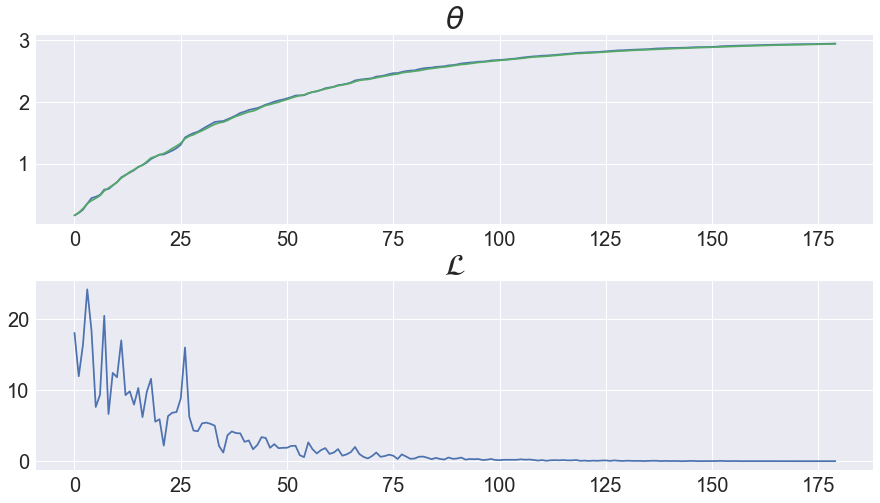

In [94]:
n_batch = int(np.ceil(dataset.shape[0]/batch_size))
for epoch in range(epochs):
    np.random.shuffle(dataset)
    for batch_idx in range(n_batch):
        ##### Start Your Code(Batch Extraction) #####
        batch = get_data_batch(dataset, batch_idx, batch_size, n_batch)
        X, Y = batch[:,1], batch[:,-1]
        ##### Start Your Code(Batch Extraction) #####
        
        ##### Start Your Code(Forward Propagation) #####
        Z1 = node1.forward(th1, X)
        Z2 = node2.forward(th0, Z1)
        Z3 = node3.forward(Y, Z2)
        Z4 = node4.forward(Z3)
        J = node5.forward(Z4)
        ##### End Your Code(Forward Propagation) #####
        
        
        ##### Start Your Code(Backpropagation) #####
        dZ4 = node5.backward(1)
        dZ3 = node4.backward(dZ4)
        _, dZ2 = node3.backward(dZ3)
        dTh0, dZ1 = node2.backward(dZ2)
        dTh1, _ = node1.backward(dZ1)
        ##### End Your Code(Backpropagation) #####
        
        
        th1_list.append(th1)
        th0_list.append(th0)
        cost_list.append(J)
        
        
        ##### Start Your Code(Gradient Descent Method) #####
        dth1 = np.sum(dTh1)
        dth0 = np.sum(dTh0)
        
        th1 = th1 - lr*dth1
        th0 = th0 - lr*dth0
        ##### Start Your Code(Gradient Descent Method) #####
        
fig, ax = plt.subplots(2, 1, figsize = (15,8))
fig.subplots_adjust(hspace = 0.3)
ax[0].plot(th1_list)
ax[0].plot(th0_list)
ax[1].plot(cost_list)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)

위의 코드들을 이용하여 trainer, reulst_visualization 함수들을 만들어줍니다. 

***
**Programming**  
result_visualization은 이미 만들어져있기 때문에, trainer의 내부를 완성하세요.

이때 trainer의 input/output은 다음과 같습니다.

- INPUT : dataset, th1, th0, lr, epochs, batch_size
- OUTPUT : th1_list, th0_list, cost_list

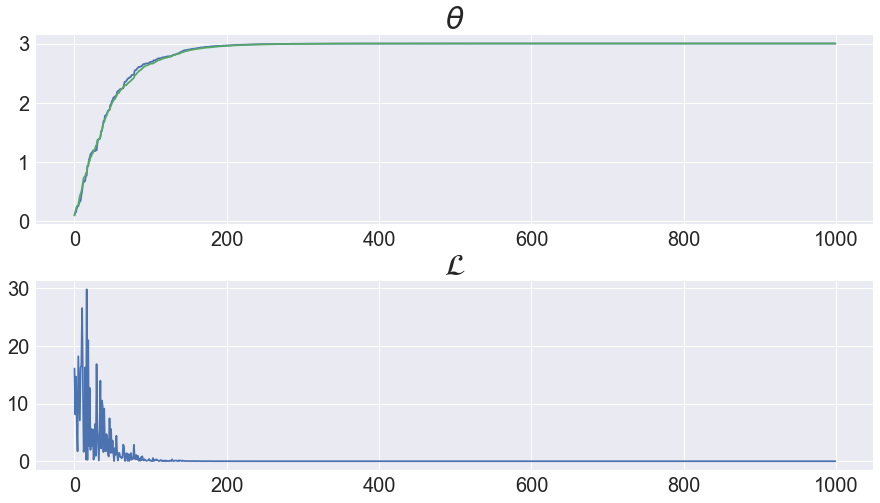

In [112]:
def trainer(dataset, th1, th0, lr, epochs, batch_size):
    ##### Start Your Code(trainer Functionalization) #####
    n_batch = int(np.ceil(dataset.shape[0]/batch_size))
    th1_list, th0_list = [], []
    cost_list = []

    for epoch in range(epochs):
        np.random.shuffle(dataset)
        for batch_idx in range(n_batch):
            batch = get_data_batch(dataset, batch_idx, batch_size, n_batch)
            X, Y = batch[:,1], batch[:,-1]

            
            Z1 = node1.forward(th1, X)
            Z2 = node2.forward(th0, Z1)
            Z3 = node3.forward(Y, Z2)
            Z4 = node4.forward(Z3)
            J = node5.forward(Z4)

            
            dZ4 = node5.backward(1)
            dZ3 = node4.backward(dZ4)
            _, dZ2 = node3.backward(dZ3)
            dTh0, dZ1 = node2.backward(dZ2)
            dTh1, _ = node1.backward(dZ1)

            
            th1_list.append(th1)
            th0_list.append(th0)
            cost_list.append(J)
            
            
            dth1 = np.sum(dTh1)
            dth0 = np.sum(dTh0)

            th1 = th1 - lr*dth1
            th0 = th0 - lr*dth0
    
    ##### Start Your Code(trainer Functionalization) #####
    return th1_list, th0_list, cost_list

def result_visualizer(th1_list, th0_list, cost_list):
    fig, ax = plt.subplots(2, 1, figsize = (15,8))
    fig.subplots_adjust(hspace = 0.3)
    ax[0].plot(th1_list)
    ax[0].plot(th0_list)
    ax[1].plot(cost_list)
    ax[0].tick_params(axis = 'both', labelsize = 20)
    ax[1].tick_params(axis = 'both', labelsize = 20)
    ax[0].set_title(r'$\theta$', fontsize = 30)
    ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
    
th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 20

batch_size = 2
th1_list, th0_list, cost_list = trainer(dataset, th1, th0, lr, epochs, batch_size)
result_visualizer(th1_list, th0_list, cost_list)

위의 두 함수를 이용하여 학습을 시키면 다음과 같습니다.

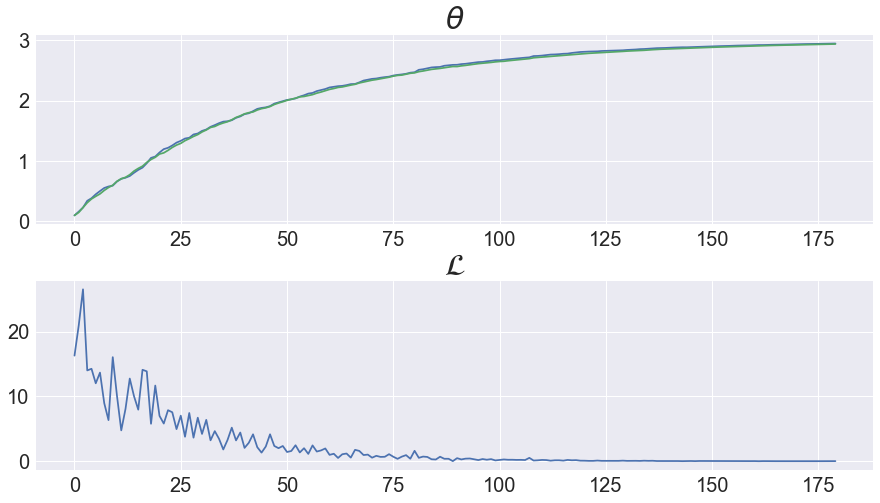

In [113]:
th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 20

batch_size = 12
th1_list, th0_list, cost_list = trainer(dataset, th1, th0, lr, epochs, batch_size)
result_visualizer(th1_list, th0_list, cost_list)

***
## Step.5 Learning with Various Batch Sizes

Step.4에서 만든 함수 2개를 이용하여 batch size가 학습에 미치는 영향을 살펴봅니다.

***
**Programming**  

다음의 조건
- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01


은 고정으로 두고, batch size를 변화시켜가며 결과를 확인하고 결과가 나온 이유를 분석하세요.  
이때 batch size는 epoch당 iteration에 변화를 만드므로 epoch도 알맞게 조절해줘야합니다. 

- batch size = 1, 2, 8, 16, 32, 100

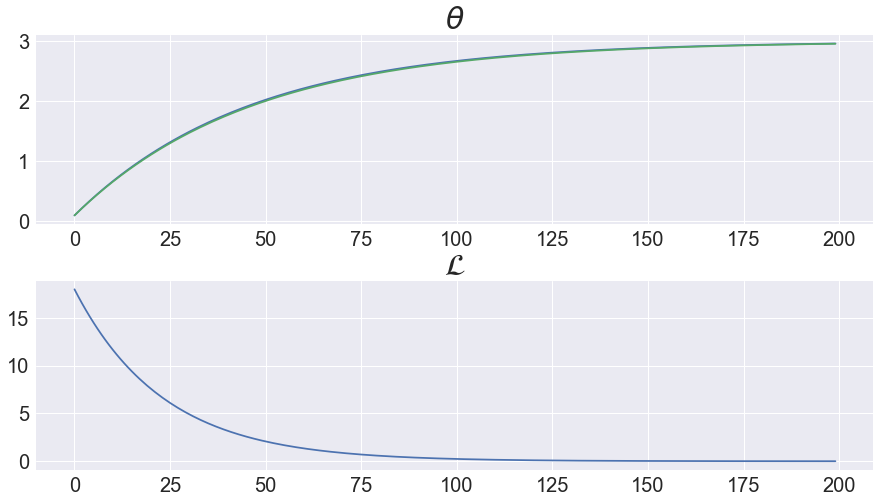

In [114]:
##### Start Your Code(Learning Preparation) #####
th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 200

batch_size = 100
##### Start Your Code(Learning Preparation) #####


# Training and Result Visualization
th1_list, th0_list, cost_list = trainer(dataset, th1, th0, lr, epochs, batch_size)
result_visualizer(th1_list, th0_list, cost_list)

***
**Programming**  

다음의 조건
- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01


은 고정으로 두고, dataset의 std와 batch size를 변화시켜가며 학습이 되는 경향을 확인하세요.  
이때 batch size는 epoch당 iteration에 변화를 만드므로 epoch도 알맞게 조절해줘야합니다. 

- mean = 0
- std = 1, 2, 3, 4
- batch size = 1, 2, 8, 16, 32, 100

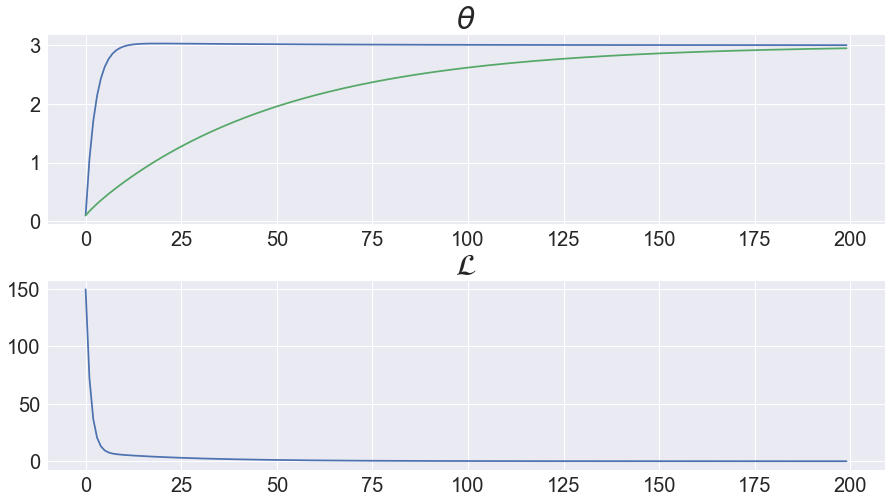

In [115]:
np.random.seed(0)
##### Start Your Code(Learning Preparation) #####
th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 200

batch_size = 100

coefficient_list = [3, 3]
distribution_params = {1:{'mean':0, 'std':4}}
##### End Your Code(Learning Preparation) #####


# Dataset Generation
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()

# Training and Result Visualization
th1_list, th0_list, cost_list = trainer(dataset, th1, th0, lr, epochs, batch_size)
result_visualizer(th1_list, th0_list, cost_list)

***
**Programming**  

다음의 조건
- initial $\theta_{1}, \theta_{0}$ = 0.1, 0.1
- learning rate = 0.01


은 고정으로 두고, dataset의 std와 batch size를 변화시켜가며 학습이 되는 경향을 확인하세요.  
이때 batch size는 epoch당 iteration에 변화를 만드므로 epoch도 알맞게 조절해줘야합니다. 

- mean = 0, 1, 2, 3, -1, -2, -3
- std = 1
- batch size = 1, 2, 8, 16, 32, 100

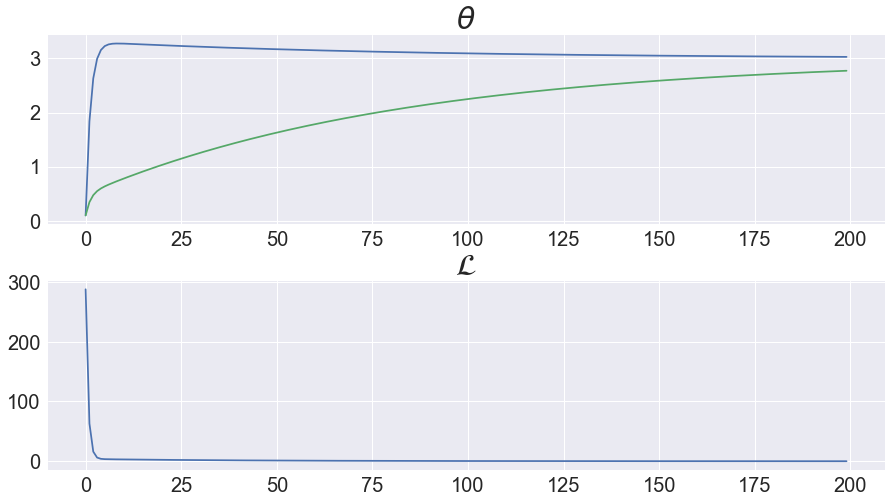

In [116]:
np.random.seed(0)
##### Start Your Code(Learning Preparation) #####
th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 200

batch_size = 100

coefficient_list = [3, 3]
distribution_params = {1:{'mean':3, 'std':4}}
##### End Your Code(Learning Preparation) #####


# Dataset Generation
data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()

# Training and Result Visualization
th1_list, th0_list, cost_list = trainer(dataset, th1, th0, lr, epochs, batch_size)
result_visualizer(th1_list, th0_list, cost_list)